In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telco_chrun_encoded.csv')
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,0,29.850000,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1889.50,0,55.573529,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,108.15,1,54.075000,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1840.75,0,40.905556,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,151.65,1,75.825000,1,0,0,0,0,1,0


In [3]:
df.shape

(7032, 25)

In [4]:
df.isnull().sum()

gender                             0
senior                             0
partner                            0
dependents                         0
tenure                             0
phone_service                      0
multiple_lines                     0
online_security                    0
online_backup                      0
device_protection                  0
tech_support                       0
streaming_tv                       0
streaming_movies                   0
paperless_billing                  0
monthly_charges                    0
total_charges                      0
churn                              0
avg_monthly_charges                0
internet_service-fiber_optic       0
internet_service-no                0
contract-one_year                  0
contract-two_year                  0
payment_method-credit_card_auto    0
payment_method-electronic_check    0
payment_method-mailed_check        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
gender                             7032 non-null int64
senior                             7032 non-null int64
partner                            7032 non-null int64
dependents                         7032 non-null int64
tenure                             7032 non-null int64
phone_service                      7032 non-null int64
multiple_lines                     7032 non-null int64
online_security                    7032 non-null int64
online_backup                      7032 non-null int64
device_protection                  7032 non-null int64
tech_support                       7032 non-null int64
streaming_tv                       7032 non-null int64
streaming_movies                   7032 non-null int64
paperless_billing                  7032 non-null int64
monthly_charges                    7032 non-null float64
total_charges                      7032 non-null float64
churn    

In [6]:
df['churn'].value_counts()

0    5163
1    1869
Name: churn, dtype: int64

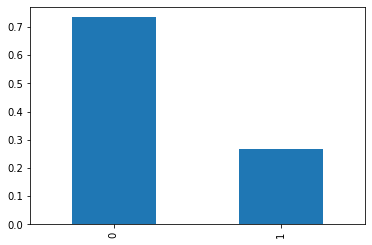

In [7]:
df['churn'].value_counts(normalize=True).plot.bar()
plt.show()

#about 25% churn

In [8]:
df=df.sample(frac=1, random_state=3)
y = df['churn']
X = df.drop('churn', axis=1)

### Building predictive algorithm using RANDOM FOREST

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

Confusion matrix - train dataset: 
 [[3589    2]
 [   4 1327]]
Overall accuracy of model - train dataset: 0.9987809833401057
AUC Score - train dataset: 0.9999848314332873


Confusion matrix - test dataset: 
 [[1413  159]
 [ 257  281]]
Overall accuracy of model - test dataset: 0.8028436018957346
AUC Score - test dataset: 0.8313463066488833


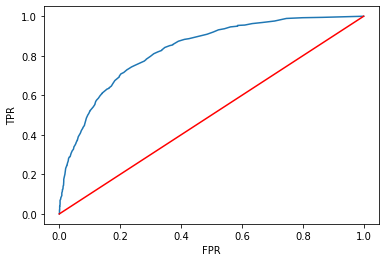

In [13]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train) 

y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Hyperparameter Tuning of Random Forest

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
from scipy.stats import randint as sp_randint

In [16]:
rfc = RandomForestClassifier(random_state=3)  #rfc will be estimator

params = {
    'n_estimators' : sp_randint(50,200),  #n_estimators taken as a range between 50 and 200 as only approx 8000 (data is not large)
    'max_features' : sp_randint(1,24),     #how mnay features to be considered at each split
    'max_depth' : sp_randint(2,10),
    'min_samples_split' : sp_randint(2,20),
    'min_samples_leaf' : sp_randint(1,20),
    'criterion' : ['gini','entropy']
}

rsearch = RandomizedSearchCV(rfc, param_distributions=params, n_iter=200, cv=3, scoring='roc_auc', random_state=3,\
                   return_train_score=True)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [17]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 16,
 'min_samples_split': 11,
 'n_estimators': 150}

In [18]:
pd.DataFrame(rsearch.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.333436,0.110667,0.045195,0.011493,gini,2,4,9,2,71,...,0.832900,0.835756,0.834112,0.001205,160,0.840169,0.839621,0.841050,0.840280,0.000588
1,2.284654,0.051388,0.131974,0.040670,entropy,5,11,12,11,188,...,0.840760,0.842430,0.842459,0.001399,76,0.862891,0.862800,0.860378,0.862023,0.001164
2,1.999153,0.172334,0.100494,0.002443,entropy,9,7,1,14,143,...,0.838745,0.846336,0.842738,0.003112,71,0.925901,0.926870,0.922670,0.925147,0.001796


In [19]:
#rank_test_score = 1 best parameter

Confusion matrix - train dataset: 
 [[3327  264]
 [ 663  668]]
Overall accuracy of model - train dataset: 0.8116619260463226
AUC Score - train dataset: 0.8728908631039993


Confusion matrix - test dataset: 
 [[1434  138]
 [ 285  253]]
Overall accuracy of model - test dataset: 0.7995260663507109
AUC Score - test dataset: 0.8427700842816198


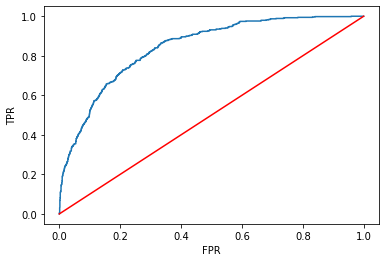

In [20]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state=3)

rfc.fit(X_train, y_train) 

y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [21]:
imp = pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['Importance'])
imp = imp.sort_values(by='Importance', ascending=False)
imp

#if tenure is removed from model, then accuracy of model will drop by 16%
#similarly, for other features
#Importance shows how much accuracy will decrease if a feature is removed
#can be used for feature selection, but features can be removed only if importnace is zero
#here, no features should be removed

,Importance
tenure,0.167668
total_charges,0.118225
contract-two_year,0.115427
internet_service-fiber_optic,0.102802
avg_monthly_charges,0.081099
monthly_charges,0.076776
payment_method-electronic_check,0.058994
contract-one_year,0.051336
internet_service-no,0.051219
online_security,0.036345
